In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Aditya Kumar\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
import time
import random

In [7]:
random.seed(100)

In [8]:
wine = pd.read_csv('winequality.csv')

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
from sklearn.preprocessing import LabelEncoder

In [12]:
bins = (2 , 6.5 , 8)
group_names = ['bad' , 'good']
pd.cut(wine['quality'] , bins = bins , labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

quality
2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

In [15]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

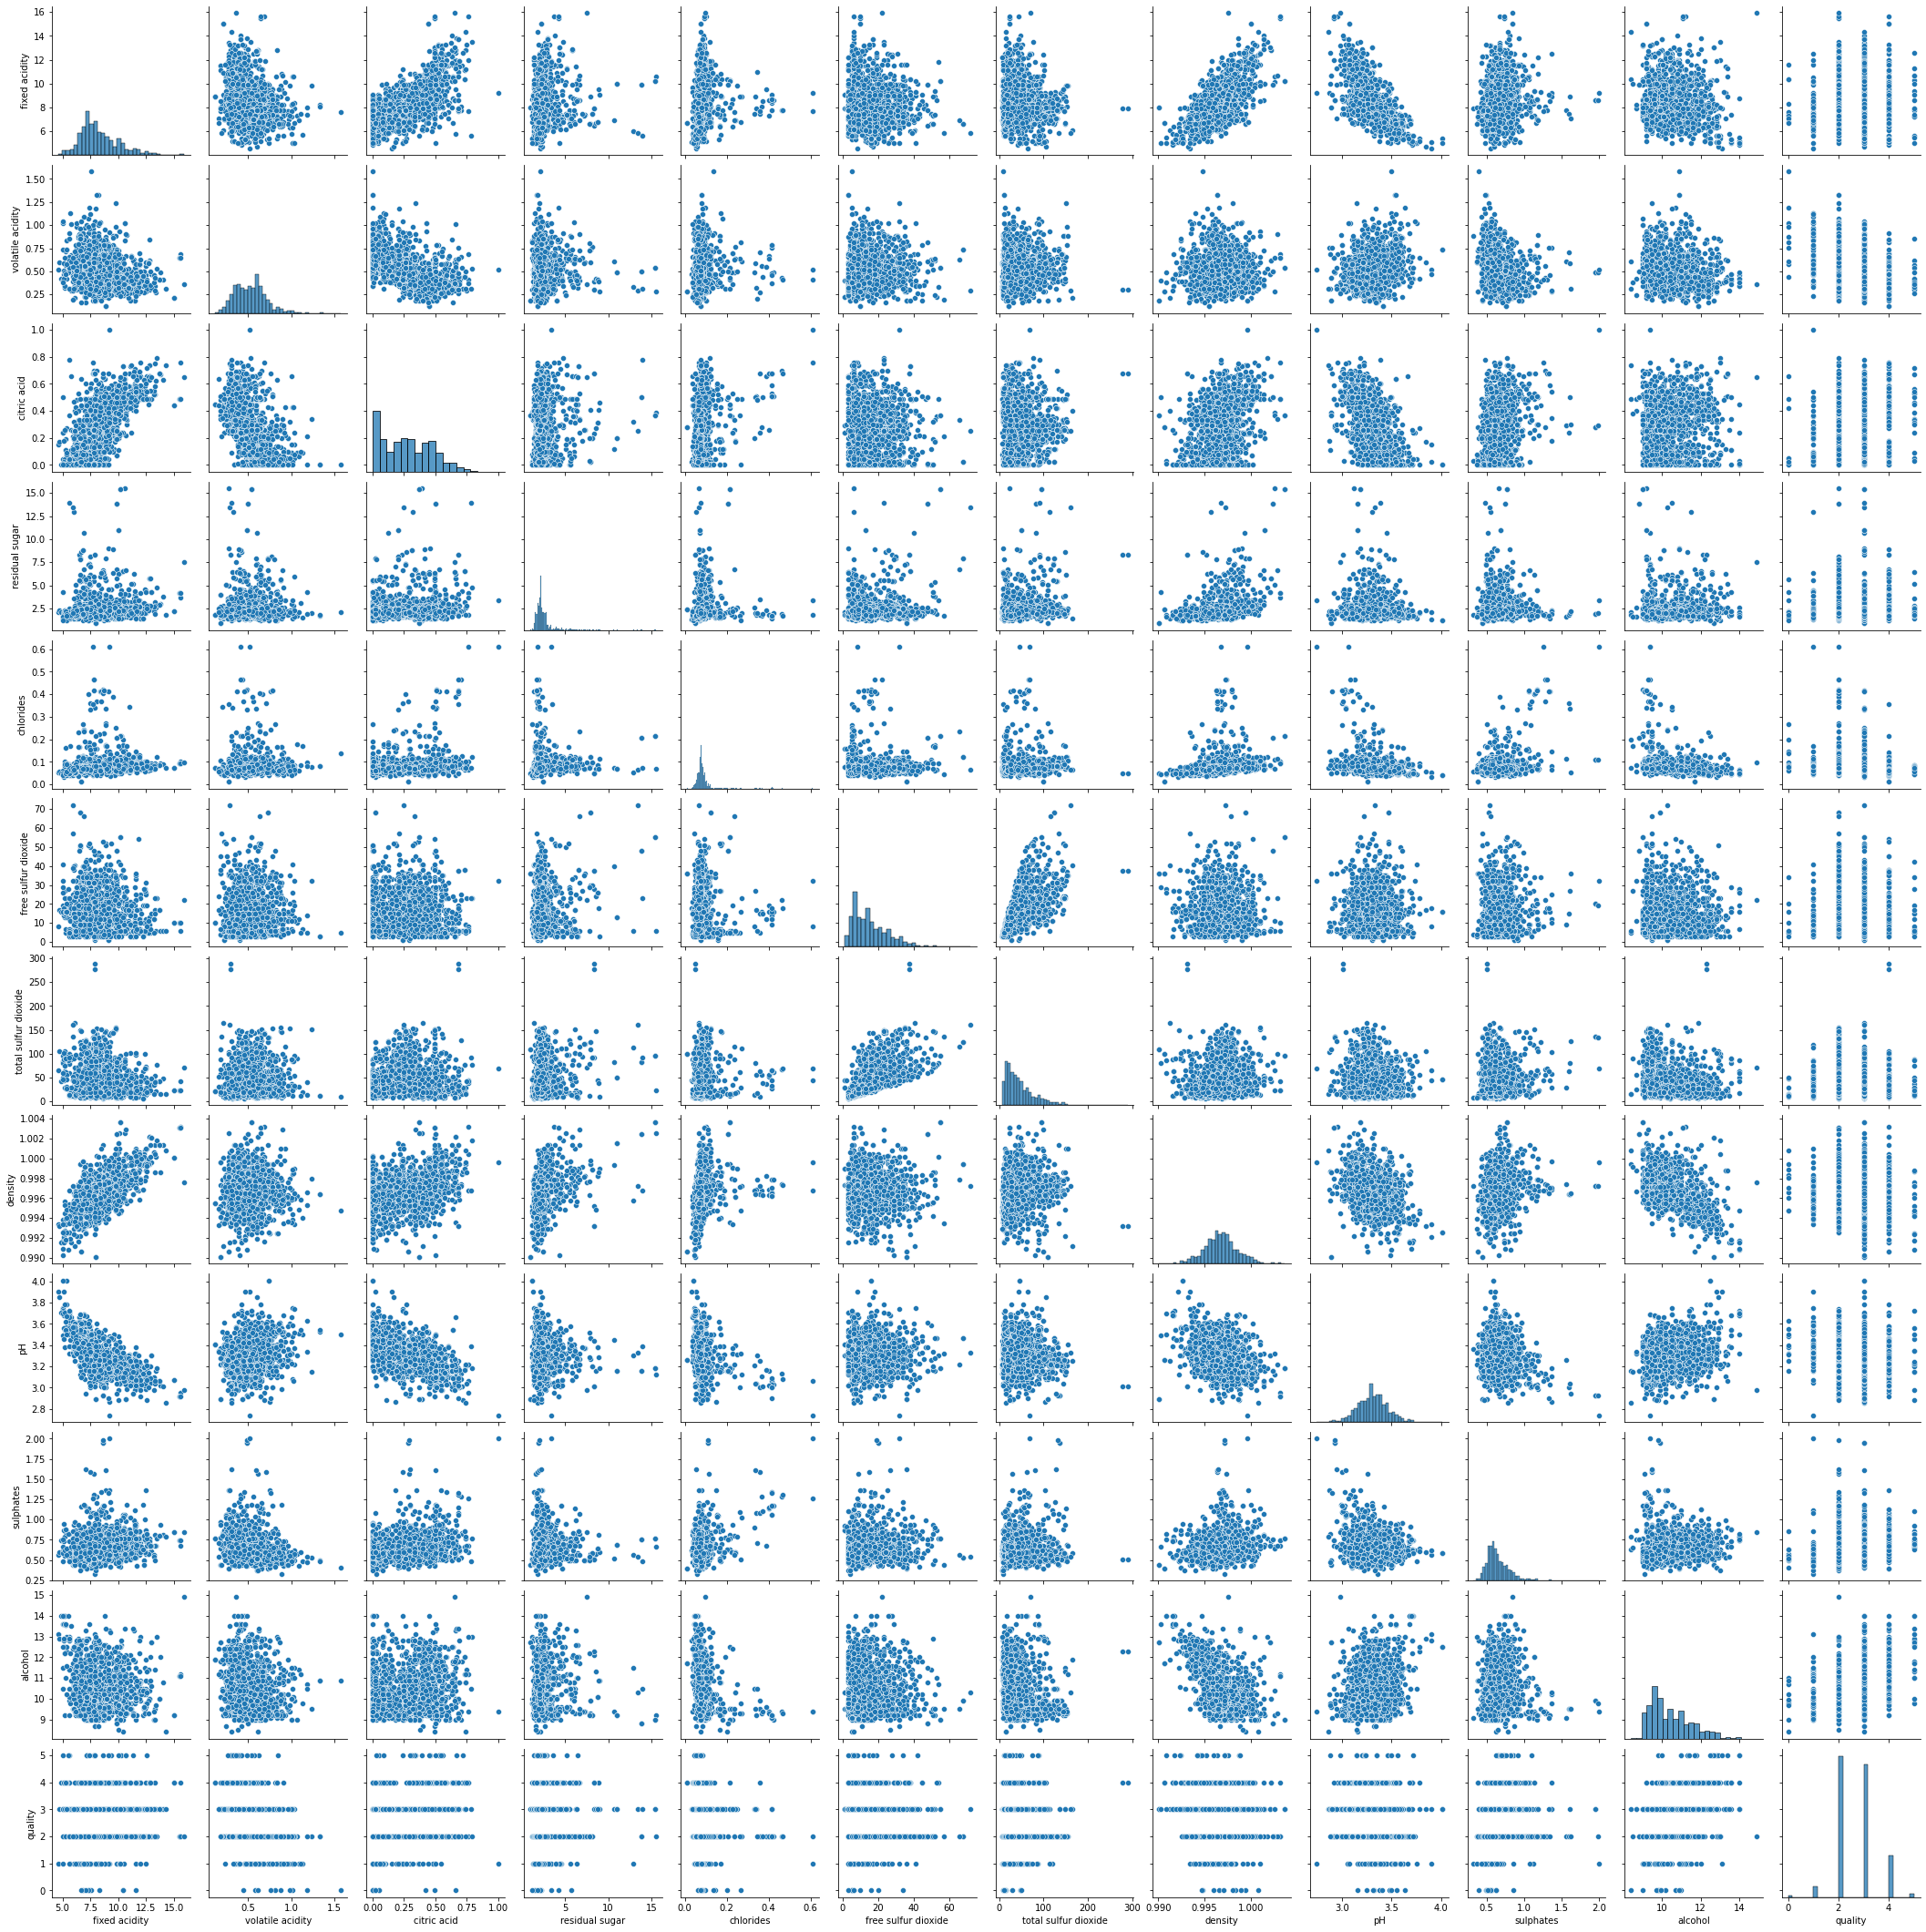

In [16]:
sns.pairplot(wine)

In [17]:
wine[wine.columns[:11]].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [18]:
X = wine.drop('quality' , axis = 1)
y = wine['quality']

In [19]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
y.head()

0    2
1    2
2    2
3    3
4    2
Name: quality, dtype: int64

In [21]:
features_label = wine.columns[:11]

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200 , criterion = 'entropy' , random_state = 0)
rf.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) fixed acidity                  0.154052
 2) volatile acidity               0.116418
 3) citric acid                    0.107016
 4) residual sugar                 0.099913
 5) chlorides                      0.089030
 6) free sulfur dioxide            0.080517
 7) total sulfur dioxide           0.077752
 8) density                        0.072258
 9) pH                             0.071140
10) sulphates                      0.067320
11) alcohol                        0.064583


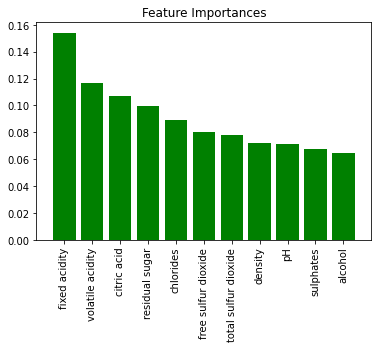

In [26]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.282631
1  0.179422
2  0.135854
3  0.108628


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lo = LogisticRegression(random_state = 0)

In [34]:
lo.fit(X_train , y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = lo.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [47]:
acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred , average = 'weighted')
rec = recall_score(y_test , y_pred , average = 'weighted')
f1 = f1_score(y_test , y_pred , average = 'weighted')

C:\Users\Aditya Kumar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.603125
The precision score is :- 0.571698270529007
The recall score is :- 0.603125
The f1 score is :- 0.585271688422499


# Support Vector Classification

In [50]:
from sklearn.svm import SVC

In [52]:
svc = SVC(random_state = 0 , kernel = 'linear')

In [54]:
svc.fit(X_train , y_train)

SVC(kernel='linear', random_state=0)

In [55]:
y_pred = svc.predict(X_test)

In [56]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.603125
The precision score is :- 0.571698270529007
The recall score is :- 0.603125
The f1 score is :- 0.585271688422499


# Radial basis Function

In [57]:
from sklearn.svm import SVC

In [58]:
rb = SVC(random_state = 0 , kernel = 'rbf')

In [59]:
rb.fit(X_train , y_train)

SVC(random_state=0)

In [60]:
y_pred = rb.predict(X_test)

In [61]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.603125
The precision score is :- 0.571698270529007
The recall score is :- 0.603125
The f1 score is :- 0.585271688422499


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train , y_train)

RandomForestClassifier()

In [66]:
y_pred = rf.predict(X_test)

In [67]:
print("The accuracy score is :- {}".format(acc))
print("The precision score is :- {}".format(prec))
print("The recall score is :- {}".format(rec))
print("The f1 score is :- {}".format(f1))

The accuracy score is :- 0.603125
The precision score is :- 0.571698270529007
The recall score is :- 0.603125
The f1 score is :- 0.585271688422499
